<a href="https://colab.research.google.com/github/mak4x13/Machine-Learning/blob/main/Balance_Scala_data_using_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/balance-scale.csv")
df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
# smote method decreased accuracy to .56
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x1, y1 = smote.fit_resample(X, y)

# X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42, test_size=0.3)
# model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)
# model.fit(X1_train, y1_train)

# y1_pred = model.predict(X1_test)
# print(confusion_matrix(y1_test, y1_pred))
# print(classification_report(y1_test, y1_pred))

[[24 39 30]
 [ 5 62 14]
 [ 9 22 55]]
              precision    recall  f1-score   support

           B       0.63      0.26      0.37        93
           L       0.50      0.77      0.61        81
           R       0.56      0.64      0.59        86

    accuracy                           0.54       260
   macro avg       0.56      0.55      0.52       260
weighted avg       0.57      0.54      0.52       260



In [ ]:
features = list(X.columns)


In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  8 10]
 [ 0 62 18]
 [ 0 20 70]]
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.69      0.78      0.73        80
           R       0.71      0.78      0.74        90

    accuracy                           0.70       188
   macro avg       0.47      0.52      0.49       188
weighted avg       0.64      0.70      0.67       188



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
target = list(df['Class'].unique())
features = list(X.columns)


In [ ]:
from sklearn.tree import export_text
r = export_text(model, feature_names=features)
print(r)

|--- L-Weight <= 2.50
|   |--- R-Distance <= 1.50
|   |   |--- L-Distance <= 2.50
|   |   |   |--- class: R
|   |   |--- L-Distance >  2.50
|   |   |   |--- class: L
|   |--- R-Distance >  1.50
|   |   |--- R-Weight <= 2.50
|   |   |   |--- class: R
|   |   |--- R-Weight >  2.50
|   |   |   |--- class: R
|--- L-Weight >  2.50
|   |--- L-Distance <= 2.50
|   |   |--- R-Weight <= 2.50
|   |   |   |--- class: L
|   |   |--- R-Weight >  2.50
|   |   |   |--- class: R
|   |--- L-Distance >  2.50
|   |   |--- R-Distance <= 3.50
|   |   |   |--- class: L
|   |   |--- R-Distance >  3.50
|   |   |   |--- class: L



In [ ]:
df['Class'].value_counts()

,count
Class,
R,288
L,288
B,49


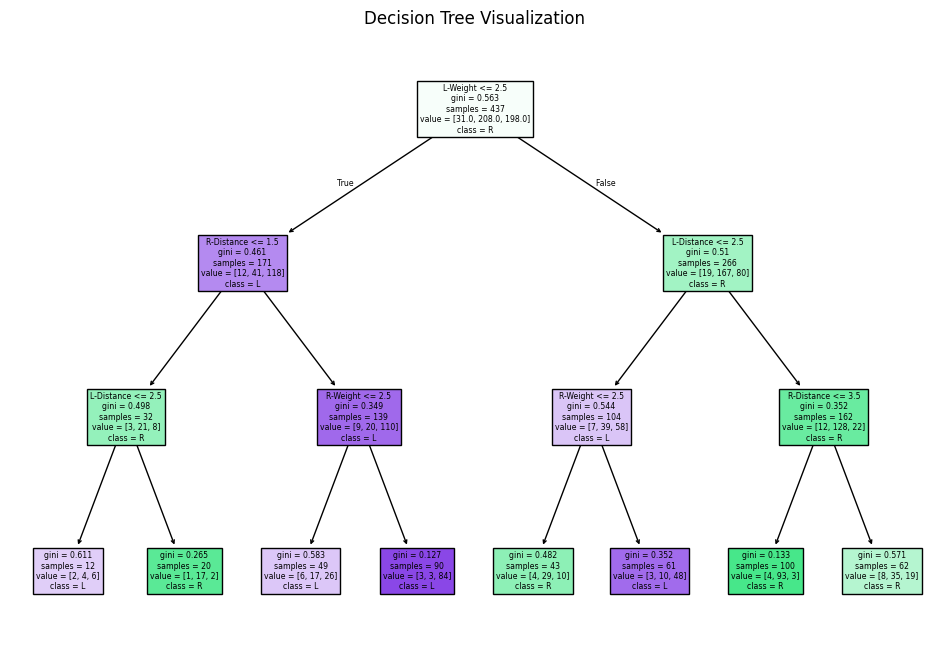

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plot_tree(model, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.title("Decision Tree Visualization")
plt.show()